<a href="https://colab.research.google.com/github/tolgasahan/nbaPlayersAnalysis/blob/main/Nba_Players_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Veri Görselleştirme**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving nba-players.csv to nba-players.csv


In [ ]:
oyuncular = pd.read_csv('nba-players.csv')
oyuncular

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [ ]:
#oyuncular veri setinin tüm sütunlarının isimlerinin  gösterir.
oyuncular.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs'],
      dtype='object')

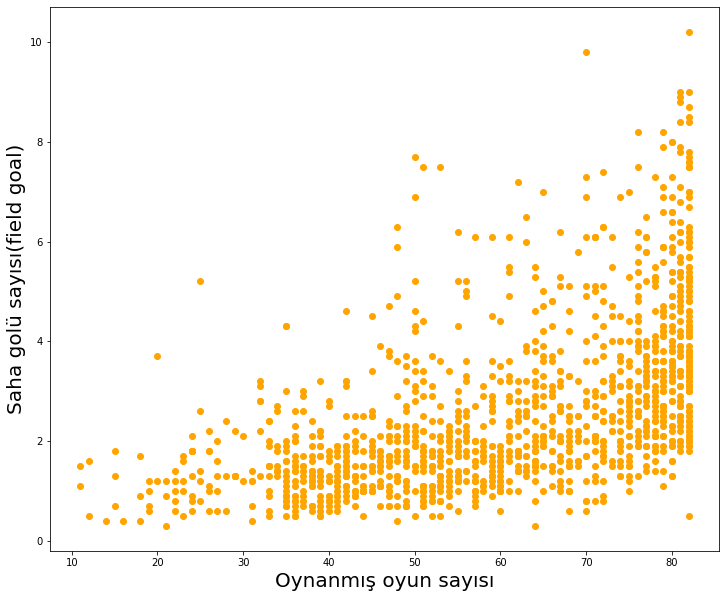

In [ ]:
#Oyuncuların oynadıkları oyun sayısı ile yaptıkları başarılı saha içi atışların saçılım grafiği.gp 'games played' fgm 'field goals made'
plt.figure(figsize = (12, 10))
plt.xlabel("Oynanmış oyun sayısı", fontsize = 20)
plt.ylabel("Saha golü sayısı(field goal)", fontsize = 20)
plt.scatter(oyuncular["gp"], oyuncular["fgm"], color = "orange")
plt.show()

In [ ]:
#her oyuncunun oynadığı toplam dakika sayısı 'gp' yani 'games played' oynanan oyun çarpı 'min' yani dakika üzerinden bulunur
oyuncular['Toplam_dakikalar'] = oyuncular['gp']*oyuncular['min']
oyuncular['Toplam_dakikalar']

0        986.4
1        941.5
2       1132.2
3        672.8
4        552.0
         ...  
1335    1264.0
1336     856.8
1337     520.3
1338     624.0
1339     549.9
Name: Toplam_dakikalar, Length: 1340, dtype: float64

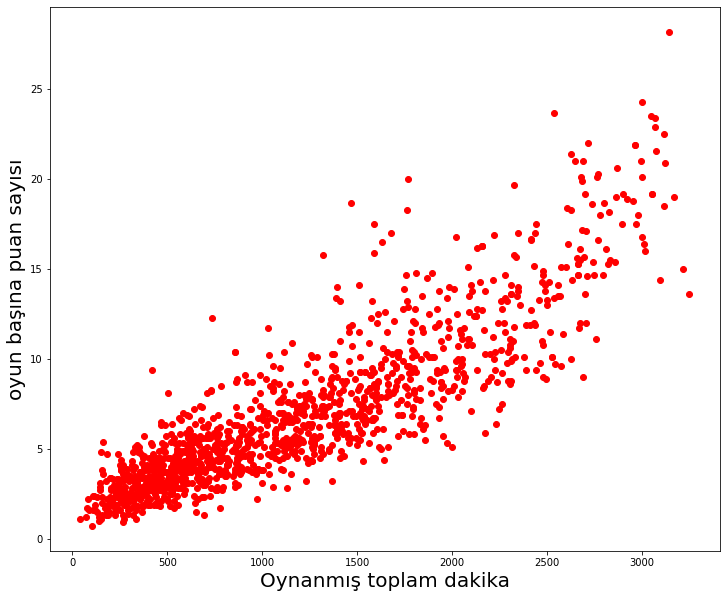

In [ ]:
plt.figure(figsize = (12, 10))
plt.xlabel("Oynanmış toplam dakika", fontsize = 20)
plt.ylabel("oyun başına puan sayısı", fontsize = 20)
plt.scatter(oyuncular['Toplam_dakikalar'],oyuncular["pts"], color = "red")
plt.show()

Text(0.5, 0, 'başarılı üçlük sayısı')

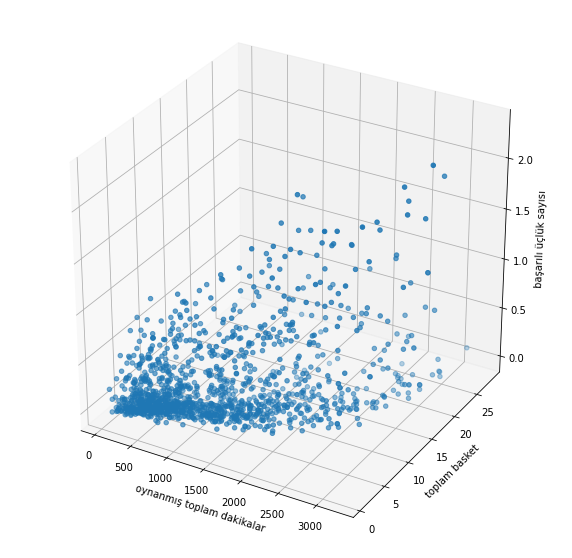

In [ ]:
plt.figure(figsize = (10, 10))
boyutlu = plt.axes(projection='3d')
boyutlu.scatter3D(oyuncular['Toplam_dakikalar'],oyuncular["pts"],oyuncular["3p_made"])
boyutlu.set_xlabel('oynanmış toplam dakikalar')
boyutlu.set_ylabel('toplam basket')
boyutlu.set_zlabel('başarılı üçlük sayısı')

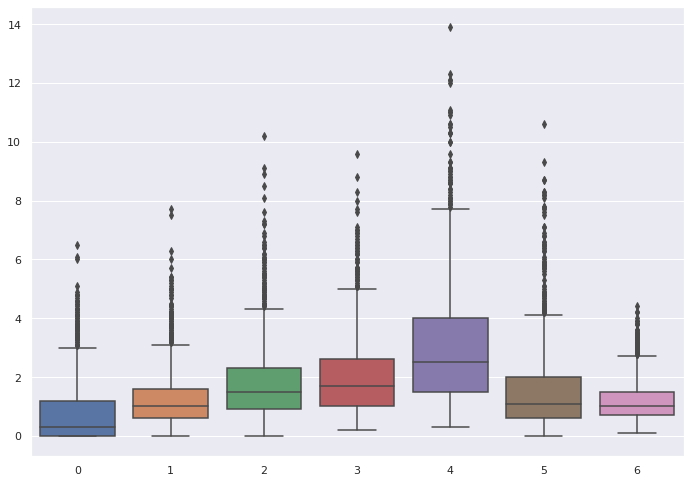

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=(oyuncular["3pa"],oyuncular["ftm"],oyuncular["fta"],oyuncular["dreb"],oyuncular["reb"],oyuncular["ast"],oyuncular["tov"]))
#3 point attempts-Free Throw made-Free Throw Attempts-Defensive Rebounds-Rebounds-Assists-Turnovers

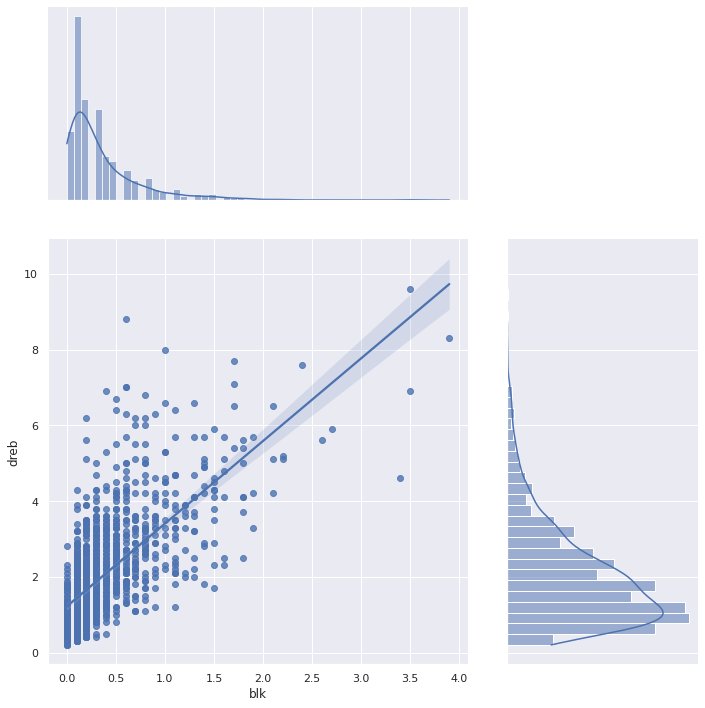

In [ ]:
#Oyuncuların defansif ribaund sayılarına karşılık yaptıkları bloklar.
sns.jointplot(x = oyuncular["blk"], y =oyuncular["dreb"],height=10,kind='reg',ratio=2 )
plt.show()

In [ ]:
#Saha atışlarını kırktan küçük olanlar,kırk ile altmış arasında olanlar ve altmıştan büyük olanlar olarak ayırır
field_goal = {}
field_goal['>= 60'] = len([k for k in oyuncular.fg if k >= 60])
field_goal['40-60'] = len([k for k in oyuncular.fg if (40 <= k) and (k < 60)])
field_goal['<40'] = len([k for k in oyuncular.fg if k < 40])

field_goal.keys()

dict_keys(['>= 60', '40-60', '<40'])

In [ ]:
# Saha atış başarı yüzdesi 40 ile 50 arasında olan oyuncuların başarı yüzdeleri değerince gruplanıp büyüten küçüğe sıralanmış tablosu. 
field_goal_df = oyuncular.fg.value_counts().reset_index()
field_goal_df.columns = ['field_goal', 'count']
field_goal_df[(field_goal_df.field_goal > 40) & (field_goal_df.field_goal < 50)]

,field_goal,count
0,43.9,15
1,41.5,15
2,42.6,15
3,43.0,15
4,45.5,14
...,...,...
177,49.2,2
184,49.9,2
191,48.9,2
194,48.8,2


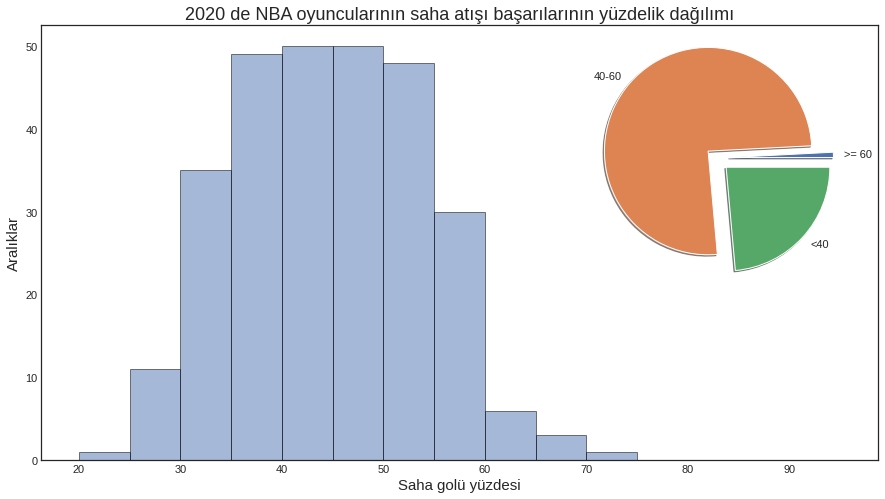

In [ ]:
plt.style.use('seaborn-white')
plt.figure(figsize = (15, 8))
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.5, 0.2, 0.3])

bins = range(20 ,100,5)
ax1.hist(x = field_goal_df.field_goal, bins = bins, alpha = 0.5, ec = 'black')

ax2.pie(x = list(field_goal.values()), labels = list(field_goal.keys()),
       shadow = True, explode = (0.2, 0.15, 0.2),
       radius = 1.5)

ax1.set_title('2020 de NBA oyuncularının saha atışı başarılarının yüzdelik dağılımı', fontsize = 18)
ax1.set_xlabel('Saha golü yüzdesi', fontsize = 15)
ax1.set_ylabel('Aralıklar', fontsize = 15)
plt.show()
#2020 yılında NBA oyuncularının saha atış denemelerinin başarı yüzdesinin dağılım grafiği

In [ ]:
#Her oyuncunun üçlük atış denemelerinin başarı yüzdelerinin gruplanmış olarak büyükten küçüğe sıralanışı
oyuncular[['3p']]
three_p =oyuncular['3p'].value_counts().reset_index()
three_p.columns = ['3points', 'counts']
three_p

,3points,counts
0,0.0,451
1,33.3,39
2,25.0,34
3,20.0,26
4,16.7,24
...,...,...
249,42.8,1
250,20.2,1
251,39.7,1
252,26.6,1


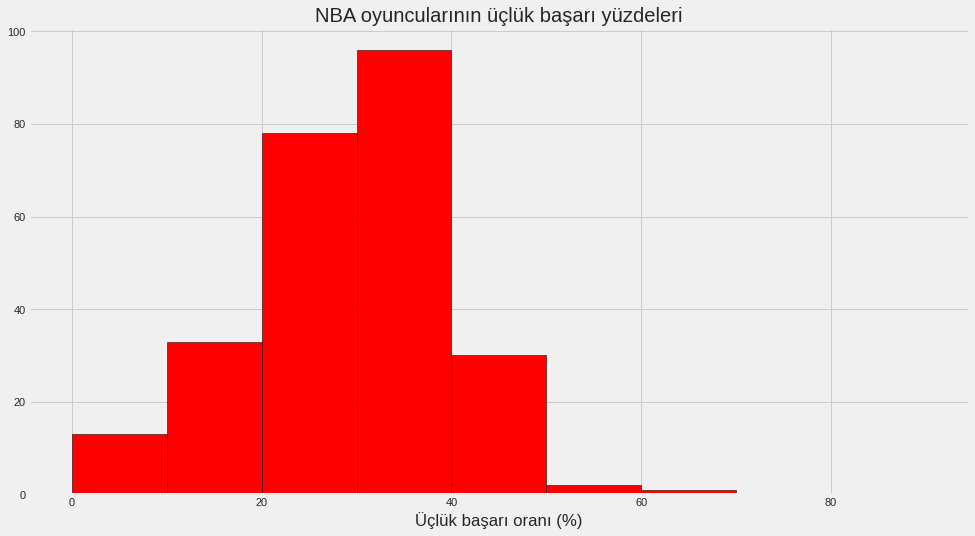

In [ ]:
plt.style.use('fivethirtyeight')
fig3, ax3 = plt.subplots(figsize = (15, 8))

ax3.hist(x = three_p['3points'],
         bins = range(0, 100, 10),
         color = 'red',
         ec = 'black')
ax3.set_title('NBA oyuncularının üçlük başarı yüzdeleri')
ax3.set_xlabel('Üçlük başarı oranı (%)')

plt.show()
#Üçlük atmada çoğu kişi yüzde 30 ila 40 arasında bir başarı oranına sahip.Bunlar 100 kişiden biraz daha az
#Bunu 20-30 grubu yaklaşık 80 oyuncu ile takip ediyor 
#10-20 ve 40-50 başarı oranı grupları aynı olan 35 kişi sayısına sahip
#%50'den daha iyi üçlük başarısı oranı olanlar ise sayıca on kişinin altında çok küçük bir grup

In [ ]:
#oyuncuların top çalma skorlarını sıralar
steals = oyuncular['stl'].value_counts().reset_index()
steals.columns = ['steal', 'counts']
steals = steals.sort_values('steal')
steals

,steal,counts
20,0.0,4
7,0.1,65
4,0.2,133
0,0.3,195
1,0.4,165
3,0.5,138
2,0.6,142
5,0.7,113
6,0.8,87
9,0.9,57


In [ ]:
#oyuncuların asist skorlarını sıralar
assist = oyuncular['ast'].value_counts().reset_index()
assist.columns = ['assist', 'counts']
assist = assist.sort_values('assist')
assist

,assist,counts
46,0.0,4
21,0.1,18
6,0.2,62
2,0.3,79
1,0.4,80
...,...,...
60,8.2,2
59,8.3,2
54,8.7,2
69,9.3,1


In [ ]:
#oyuncuların blok skorlarını sıralar
block = oyuncular['blk'].value_counts().reset_index()
block.columns = ['block', 'counts']
block = block.sort_values('block')
block

,block,counts
3,0.0,139
0,0.1,368
1,0.2,203
2,0.3,182
4,0.4,88
5,0.5,79
6,0.6,60
8,0.7,40
7,0.8,44
10,0.9,22


In [ ]:
#oyuncuların defansif ribaount skorlarını sıralar
deffensive_reb = oyuncular['dreb'].value_counts().reset_index()
deffensive_reb.columns = ['dreb', 'counts']
deffensive_reb = deffensive_reb.sort_values('dreb')

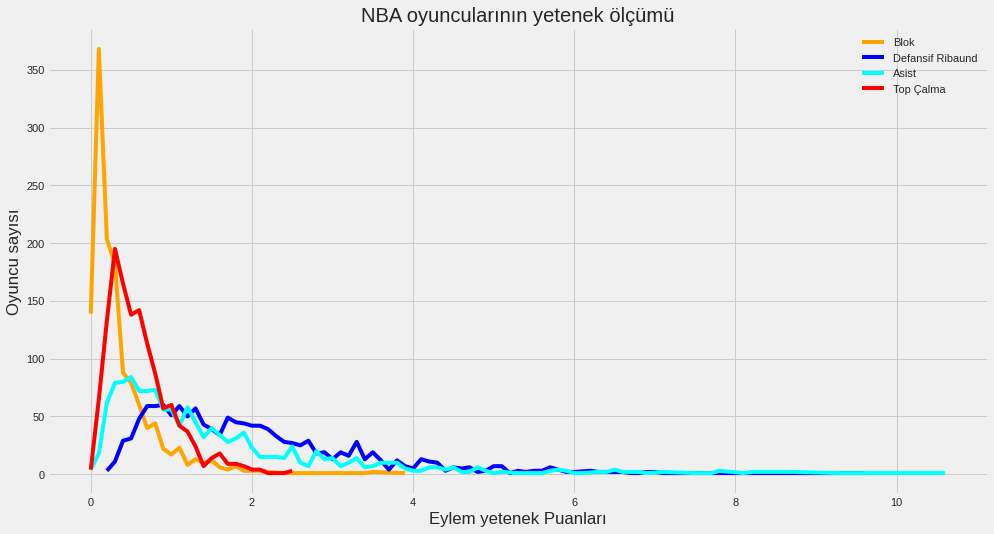

In [ ]:
fig4, ax4 = plt.subplots(figsize = (15, 8))
ax4.plot(block.block, block.counts, color = 'orange', label = 'Blok')
ax4.plot(deffensive_reb.dreb, deffensive_reb.counts, color = 'blue', label = 'Defansif Ribaund')
ax4.plot(assist.assist, assist.counts, color = 'cyan', label = 'Asist')
ax4.plot(steals.steal, steals.counts, color = 'red', label = 'Top Çalma')

ax4.set_title('NBA oyuncularının yetenek ölçümü')
ax4.legend()
ax4.set_xlabel('Eylem yetenek Puanları')
ax4.set_ylabel('Oyuncu sayısı')

plt.show()

In [ ]:
#Serbest atışları kırktan küçük olanlar,kırk ile altmış arasında olanlar, altmış ile seksen arasında olanlar ve seksenden büyük olanlar olarak ayırır
free_throw = {}
free_throw['>= 80'] = len([k for k in oyuncular.ft if k >= 80])
free_throw['60-80'] = len([k for k in oyuncular.ft if (k>=60) & (k < 80)])
free_throw['40-60'] = len([k for k in oyuncular.ft if (k>=40) & (k<60)])
free_throw['<40'] = len([k for k in oyuncular.ft if (k<40)])

free_throw

{'40-60': 187, '60-80': 907, '<40': 13, '>= 80': 233}

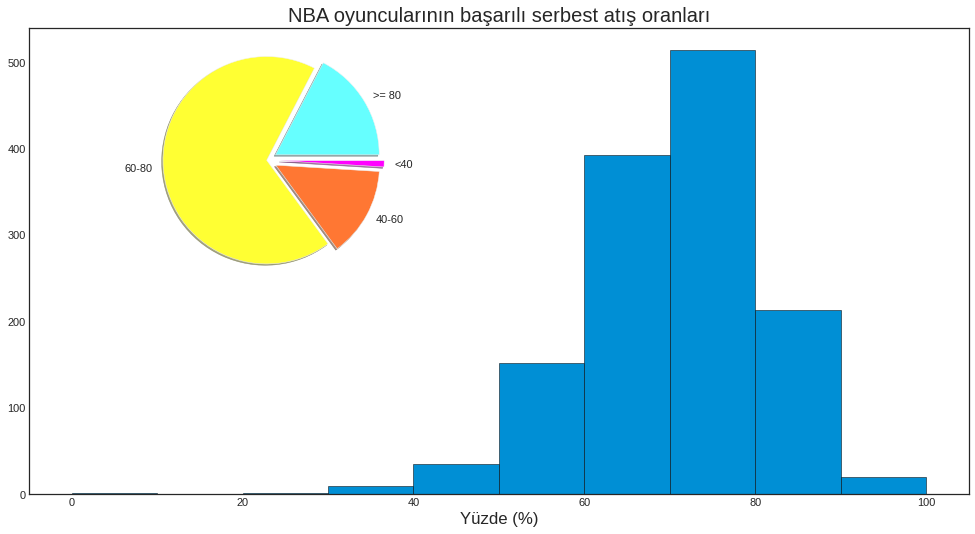

In [ ]:
plt.style.use('seaborn-white')
plt.figure(figsize = (15, 8))
ax5 = plt.axes()
ax6 = plt.axes([0.2, 0.5, 0.2, 0.3])

colors = ['#66FFFF', '#FFFF33', '#FF7733', '#FF00FF']

ax5.hist(x = oyuncular.ft,
         bins = range(0, 110, 10), ec = 'black')
ax5.set_xlabel('Yüzde (%)')
ax5.set_title('NBA oyuncularının başarılı serbest atış oranları')


ax6.pie(list(free_throw.values()),
        labels = list(free_throw.keys()),
        colors = colors,
        explode = (0.15, 0, 0.15, 0.2),
        radius = 1.5, shadow = True)

plt.show()

In [ ]:
toplam_dakikalar = oyuncular.Toplam_dakikalar
toplam_dakikalar.describe()

count    1340.000000
mean     1150.204478
std       747.382409
min        43.400000
25%       525.150000
50%       988.450000
75%      1636.050000
max      3247.200000
Name: Toplam_dakikalar, dtype: float64

In [ ]:
def get_average_target(a, b):
    df = oyuncular[(oyuncular.Toplam_dakikalar >= a) & (oyuncular.Toplam_dakikalar < b)]
    return round(np.mean(df.target_5yrs), 2)

get_average_target(0,500)
#2020 yılında 0 ile 500 dakika arasında oyunda kalmış oyuncuların gelecek beş yıl içinde ligde kalma ihtimali başarı oranı

0.36

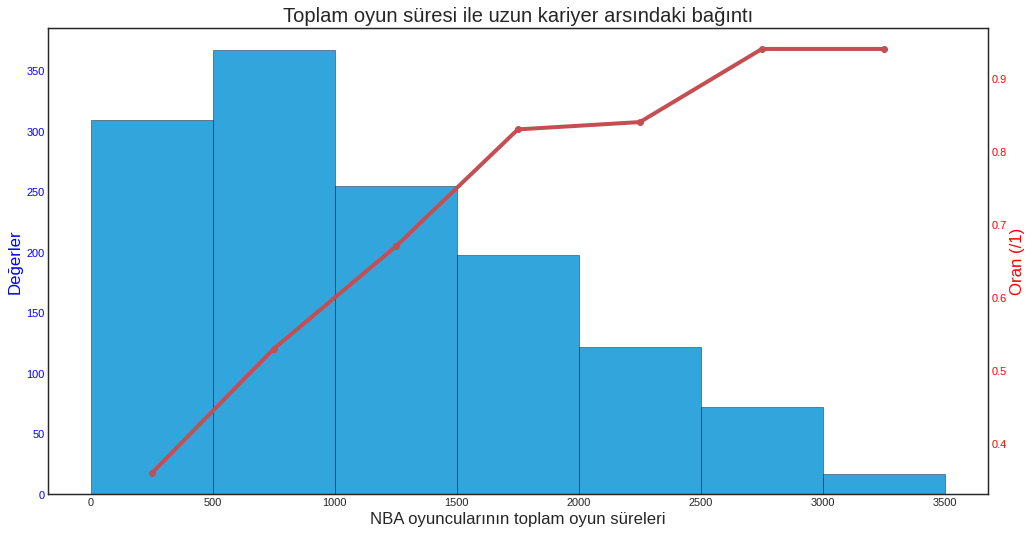

In [ ]:
fig6, ax6 = plt.subplots(figsize = (15, 8))
bins = range(0, 4000, 500)
x = range(250, 3500, 500)
y = [get_average_target(bins[i], bins[i+1]) for i in range(len(bins)-1)]
ax6.hist(toplam_dakikalar,
         bins = bins,
         alpha = 0.8,
         ec = 'black')

ax6_ = ax6.twinx()
ax6_.plot(x, y, 'r-o')

ax6.set_xlabel('NBA oyuncularının toplam oyun süreleri')
ax6.set_title('Toplam oyun süresi ile uzun kariyer arsındaki bağıntı')

ax6.set_ylabel('Değerler', color = 'blue')
ax6_.set_ylabel('Oran (/1)', color = 'red')

ax6.tick_params(axis = 'y', colors = 'blue')
ax6_.tick_params(axis = 'y', colors = 'red')

# **Veri setinin öğrenmeye uygun hale getirilmesi**

In [ ]:
uploaded = files.upload()

Saving nba-players-son.csv to nba-players-son.csv


In [ ]:
df = pd.read_csv('nba-players-son.csv')
df

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1289,1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1290,1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1291,1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1293 non-null   int64  
 1   name         1293 non-null   object 
 2   gp           1293 non-null   int64  
 3   min          1293 non-null   float64
 4   pts          1293 non-null   float64
 5   fgm          1293 non-null   float64
 6   fga          1293 non-null   float64
 7   fg           1293 non-null   float64
 8   3p_made      1293 non-null   float64
 9   3pa          1293 non-null   float64
 10  3p           1293 non-null   float64
 11  ftm          1293 non-null   float64
 12  fta          1293 non-null   float64
 13  ft           1293 non-null   float64
 14  oreb         1293 non-null   float64
 15  dreb         1293 non-null   float64
 16  reb          1293 non-null   float64
 17  ast          1293 non-null   float64
 18  stl          1293 non-null   float64
 19  blk   

In [ ]:
beşyıl_ligde=df[df['target_5yrs']==1]
beşyıl_değil=df[df['target_5yrs']==0]
print(beşyıl_ligde.shape,beşyıl_değil.shape,df.shape)

(807, 22) (486, 22) (1293, 22)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x1 = df.drop("target_5yrs", axis=1,)
x1.drop(["Unnamed: 0","name"], inplace=True, axis=1)
#x.drop('name',inplace=True,axis=1)
y = df['target_5yrs']
scaler=MinMaxScaler()
x=scaler.fit_transform(x1)
print(x)
#Veri setinden gereksiz olan sıra ve isim bilgisi içeren kolon çıkarıldı.

[[0.35211268 0.64285714 0.24363636 ... 0.16       0.1025641  0.27906977]
 [0.33802817 0.62962963 0.23636364 ... 0.44       0.12820513 0.34883721]
 [0.88732394 0.32275132 0.16363636 ... 0.2        0.07692308 0.20930233]
 ...
 [0.45070423 0.23809524 0.17090909 ... 0.12       0.1025641  0.18604651]
 [0.57746479 0.23544974 0.13818182 ... 0.16       0.02564103 0.1627907 ]
 [0.50704225 0.22751323 0.13454545 ... 0.28       0.02564103 0.18604651]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=0)
rusx_df,rusy_df=rus.fit_resample(x,y)
print(rusx_df.shape,rusy_df.shape)

(972, 19) (972,)


In [ ]:
print(rusx_df)

[[0.35211268 0.64285714 0.24363636 ... 0.16       0.1025641  0.27906977]
 [0.33802817 0.62962963 0.23636364 ... 0.44       0.12820513 0.34883721]
 [0.88732394 0.32275132 0.16363636 ... 0.2        0.07692308 0.20930233]
 ...
 [0.81690141 0.31216931 0.22909091 ... 0.08       0.1025641  0.23255814]
 [0.95774648 0.57142857 0.28363636 ... 0.24       0.07692308 0.23255814]
 [1.         0.39153439 0.26909091 ... 0.36       0.02564103 0.25581395]]


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
#Rastgele aşağı örnekleme veri seti test ve eğitim olarak ayrıldı
rusx_train, rusx_test, rusy_train, rusy_test = train_test_split(rusx_df, rusy_df, test_size=0.2, random_state=6)
print(f"Training target statistics: {Counter(rusy_train)}")
print(f"Testing target statistics: {Counter(rusy_test)}")
print(rusx_train.shape,rusx_test.shape,rusy_train.shape,rusy_test.shape)

Training target statistics: Counter({1: 393, 0: 384})
Testing target statistics: Counter({0: 102, 1: 93})
(777, 19) (195, 19) (777,) (195,)


In [ ]:
print(rusx_train)

[[0.49295775 0.2010582  0.08       ... 0.16       0.02564103 0.1627907 ]
 [0.45070423 0.14550265 0.09818182 ... 0.16       0.02564103 0.20930233]
 [0.97183099 0.84391534 0.65454545 ... 0.4        0.25641026 0.62790698]
 ...
 [0.30985915 0.33068783 0.08363636 ... 0.16       0.02564103 0.13953488]
 [0.98591549 0.72486772 0.49454545 ... 0.72       0.02564103 0.6744186 ]
 [0.57746479 0.35978836 0.20363636 ... 0.12       0.17948718 0.11627907]]


In [ ]:
#dengesiz veri test ve eğitim olarak ayırma işlemi
densizx_train, densizx_test, densizy_train, densizy_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(f"Training target statistics: {Counter(densizy_train)}")
print(f"Testing target statistics: {Counter(densizy_test)}")
print(densizx_train.shape,densizx_test.shape,densizy_train.shape,densizy_test.shape)
# 1 ve 0 oranları bozulmadan bir bölme işlemi sağlandı

Training target statistics: Counter({1: 642, 0: 392})
Testing target statistics: Counter({1: 165, 0: 94})
(1034, 19) (259, 19) (1034,) (259,)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=4)
smox_df,smoy_df=smote.fit_resample(x,y)
#print(f"Training target statistics: {Counter(smox_df)}")
print(f"Testing target statistics: {Counter(smoy_df)}")
print(smox_df.shape,smoy_df.shape)

Testing target statistics: Counter({0: 807, 1: 807})
(1614, 19) (1614,)


In [ ]:
smox_train, smox_test, smoy_train, smoy_test = train_test_split(smox_df,smoy_df, test_size=0.2, random_state=5)
print(f"Training target statistics: {Counter(smoy_train)}")
print(f"Testing target statistics: {Counter(smoy_test)}")
print(smox_train.shape,smox_test.shape,smoy_train.shape,smoy_test.shape)

Training target statistics: Counter({1: 659, 0: 632})
Testing target statistics: Counter({0: 175, 1: 148})
(1291, 19) (323, 19) (1291,) (323,)


# **Gradient Boosting**


**Modelin tanımlanması:**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def ml_alg(X_train, y_train, X_test, y_test, ml, gS):
  ml.fit(X_train,y_train)
  y_pred = ml.predict(X_test)
  acc_test_train = np.array([ml.score(X_test,y_test),ml.score(X_train,y_train)])
  print("Karışıklık matrisi:\n",confusion_matrix(y_test, y_pred))
  print("\nSınıflandırma raporu:\n",classification_report(y_test, y_pred))
  if(gS == 1):
    print("En iyi parametreler: %s\n" %ml.best_params_)
  return acc_test_train

**Dengesiz veri seti ile eğitilmesi ve sonuçlar:**

In [ ]:
unb =  ml_alg(densizx_train, densizy_train, densizx_test, densizy_test, gb, 0)
#unb =  ml_alg(X_train, y_train, X_test, y_test, gb, 0)
print("Dengesiz test kümesinin başarı oranı: ",unb[0])
print("Dengesiz train kümesinin başarı oranı: ",unb[1])

Karışıklık matrisi:
 [[ 51  43]
 [ 40 125]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55        94
           1       0.74      0.76      0.75       165

    accuracy                           0.68       259
   macro avg       0.65      0.65      0.65       259
weighted avg       0.68      0.68      0.68       259

Dengesiz test kümesinin başarı oranı:  0.6795366795366795
Dengesiz train kümesinin başarı oranı:  0.874274661508704


**Random Unsampling uygulanmış veri seti ile eğitim ve test:**

In [ ]:
ru = ml_alg(rusx_train, rusy_train, rusx_test, rusy_test, gb, 0)
#ru = ml_alg(Xr_train, yr_train, Xr_test, yr_test, gb, 0)

print("Dengeli(Random Unsampling) test kümesinin başarı oranı: ",ru[0])
print("Dengeli(Random Unsampling) train kümesinin başarı oranı: ",ru[1])

Karışıklık matrisi:
 [[74 28]
 [30 63]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       102
           1       0.69      0.68      0.68        93

    accuracy                           0.70       195
   macro avg       0.70      0.70      0.70       195
weighted avg       0.70      0.70      0.70       195

Dengeli(Random Unsampling) test kümesinin başarı oranı:  0.7025641025641025
Dengeli(Random Unsampling) train kümesinin başarı oranı:  0.8867438867438867


**SMOTE uygulanmış veri seti ile eğitim ve test:**

In [ ]:
smt = ml_alg(smox_train, smoy_train, smox_test, smoy_test, gb, 0)
#smt = ml_alg(Xs_train, ys_train, Xs_test, ys_test, gb, 0)

print("Dengeli(SMOTE) test kümesinin başarı oranı: ",smt[0])
print("Dengeli(SMOTE) train kümesinin başarı oranı: ",smt[1])

Karışıklık matrisi:
 [[126  49]
 [ 39 109]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       175
           1       0.69      0.74      0.71       148

    accuracy                           0.73       323
   macro avg       0.73      0.73      0.73       323
weighted avg       0.73      0.73      0.73       323

Dengeli(SMOTE) test kümesinin başarı oranı:  0.7275541795665634
Dengeli(SMOTE) train kümesinin başarı oranı:  0.8752904725019365


**En uygun hiperparametrelerin bulunması:**


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 7, 9],
    'subsample': [0.5, 0.7, 1.0],
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.001, 0.01, 0.1],
    'min_samples_split':[2 , 5, 10], 
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid, n_jobs = -1, verbose=2, cv=2)


**Dengesiz veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
unb_H = ml_alg(densizx_train, densizy_train, densizx_test, densizy_test, grid_search, 1)
print("Dengesiz test kümesi ile grid search uygulanmış modelin başarı oranı: ",unb_H[0])
print("Dengesiz train kümesi ile grid search uygulanmış modelin başarı oranı: ",unb_H[1])

Fitting 2 folds for each of 243 candidates, totalling 486 fits
Karışıklık matrisi:
 [[ 55  39]
 [ 37 128]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.60      0.59      0.59        94
           1       0.77      0.78      0.77       165

    accuracy                           0.71       259
   macro avg       0.68      0.68      0.68       259
weighted avg       0.71      0.71      0.71       259

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.7}

Dengesiz test kümesi ile grid search uygulanmış modelin başarı oranı:  0.7065637065637066
Dengesiz train kümesi ile grid search uygulanmış modelin başarı oranı:  0.8297872340425532


**Random Undersampling veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
ru_H = ml_alg(rusx_train, rusy_train, rusx_test, rusy_test, grid_search, 1)
print("Dengeli(Random Unsampling) test kümesi ile grid search uygulanmış modelin başarı oranı: ",ru_H[0])
print("Dengeli(Random Unsampling) train kümesi ile grid search uygulanmış modelin başarı oranı: ",ru_H[1])

Fitting 2 folds for each of 243 candidates, totalling 486 fits
Karışıklık matrisi:
 [[75 27]
 [33 60]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71       102
           1       0.69      0.65      0.67        93

    accuracy                           0.69       195
   macro avg       0.69      0.69      0.69       195
weighted avg       0.69      0.69      0.69       195

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.7}

Dengeli(Random Unsampling) test kümesi ile grid search uygulanmış modelin başarı oranı:  0.6923076923076923
Dengeli(Random Unsampling) train kümesi ile grid search uygulanmış modelin başarı oranı:  1.0


**Smote veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
smt_H = ml_alg(smox_train, smoy_train, smox_test, smoy_test, grid_search, 1)

print("Dengeli(SMOTE) test kümesi ile grid search uygulanmış modelin başarı oranı: ",smt_H[0])
print("Dengeli(SMOTE) train kümesi ile grid search uygulanmış modelin başarı oranı: ",smt_H[1])

Fitting 2 folds for each of 243 candidates, totalling 486 fits
Karışıklık matrisi:
 [[135  40]
 [ 38 110]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       175
           1       0.73      0.74      0.74       148

    accuracy                           0.76       323
   macro avg       0.76      0.76      0.76       323
weighted avg       0.76      0.76      0.76       323

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.7}

Dengeli(SMOTE) test kümesi ile grid search uygulanmış modelin başarı oranı:  0.7585139318885449
Dengeli(SMOTE) train kümesi ile grid search uygulanmış modelin başarı oranı:  1.0


**Başarı oranları tablo:**

In [ ]:
def acc_table(unb,unb_H,ru,ru_H,smt,smt_H):
  acc_table= np.array([[unb[0], unb[1], unb_H[0], unb_H[1]], 
                     [ru[0], ru[1], ru_H[0], ru_H[1]], 
                     [smt[0], smt[1], smt_H[0], smt_H[1]]])

  index = np.array(['Dengesiz veri seti','Random Unsampling Uygulanmış veri seti','SMOTE Uygulanmış veri seti'])
  columns = np.array(['test_acc', 'train_acc', 'test_acc_h', 'train_acc_h'])

  return pd.DataFrame(data = acc_table, index=index, columns=columns)

In [ ]:
tab = acc_table(unb,unb_H,ru,ru_H,smt,smt_H)
tab

,test_acc,train_acc,test_acc_h,train_acc_h
Dengesiz veri seti,0.679537,0.874275,0.706564,0.829787
Random Unsampling Uygulanmış veri seti,0.702564,0.886744,0.692308,1.000000
SMOTE Uygulanmış veri seti,0.727554,0.875290,0.758514,1.000000


# **XG BOOST**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()


**Dengesiz veri seti ile eğitilmesi ve sonuçlar:**

In [ ]:
unb =  ml_alg(densizx_train, densizy_train, densizx_test, densizy_test, xgb, 0)
print("Dengesiz test kümesinin başarı oranı: ",unb[0])
print("Dengesiz train kümesinin başarı oranı: ",unb[1])

Karışıklık matrisi:
 [[ 55  39]
 [ 41 124]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58        94
           1       0.76      0.75      0.76       165

    accuracy                           0.69       259
   macro avg       0.67      0.67      0.67       259
weighted avg       0.69      0.69      0.69       259

Dengesiz test kümesinin başarı oranı:  0.6911196911196911
Dengesiz train kümesinin başarı oranı:  0.8471953578336557


**Random Unsampling uygulanmış veri seti ile eğitim ve test:**

In [ ]:
ru = ml_alg(rusx_train, rusy_train, rusx_test, rusy_test, xgb, 0)

print("Dengeli(Random Unsampling) test kümesinin başarı oranı: ",ru[0])
print("Dengeli(Random Unsampling) train kümesinin başarı oranı: ",ru[1])

Karışıklık matrisi:
 [[70 32]
 [32 61]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       102
           1       0.66      0.66      0.66        93

    accuracy                           0.67       195
   macro avg       0.67      0.67      0.67       195
weighted avg       0.67      0.67      0.67       195

Dengeli(Random Unsampling) test kümesinin başarı oranı:  0.6717948717948717
Dengeli(Random Unsampling) train kümesinin başarı oranı:  0.8494208494208494


**SMOTE uygulanmış veri seti ile eğitim ve test:**

In [ ]:
smt = ml_alg(smox_train, smoy_train, smox_test, smoy_test, xgb, 0)

print("Dengeli(SMOTE) veri kümesinin başarı oranı: ",smt[0])
print("Dengeli(SMOTE) veri kümesinin başarı oranı: ",smt[1])

Karışıklık matrisi:
 [[132  43]
 [ 41 107]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       175
           1       0.71      0.72      0.72       148

    accuracy                           0.74       323
   macro avg       0.74      0.74      0.74       323
weighted avg       0.74      0.74      0.74       323

Dengeli(SMOTE) veri kümesinin başarı oranı:  0.739938080495356
Dengeli(SMOTE) veri kümesinin başarı oranı:  0.8690937257939582


In [ ]:
param_grid = {
            'n_estimators': [100, 500, 900, 1100, 1500],
            'max_depth':[2, 3, 5, 10, 15],
            'learning_rate':[0.05,0.1,0.15,0.20],
            'min_child_weight':[1,2,3,4],
            'subsample': [0.5, 1.0, 0.11],
            'eta': [0.1, 0.26, 0.05],
            'booster':['gbtree','gblinear'],
            'colsample_bytree': [0.5, 1.0, 0.11]
        }
grid_search = GridSearchCV(XGBClassifier() , param_grid = param_grid, n_jobs = -1, cv=5)


**Dengesiz veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
unb_H = ml_alg(densizx_train, densizy_train, densizx_test, densizy_test, grid_search, 1)
print("Dengesiz test kümesi ile grid search uygulanmış modelin başarı oranı: ",unb_H[0])
print("Dengesiz train kümesi ile grid search uygulanmış modelin başarı oranı: ",unb_H[1])

Karışıklık matrisi:
 [[ 54  40]
 [ 33 132]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.62      0.57      0.60        94
           1       0.77      0.80      0.78       165

    accuracy                           0.72       259
   macro avg       0.69      0.69      0.69       259
weighted avg       0.71      0.72      0.72       259

En iyi parametreler: {'booster': 'gbtree', 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}

Dengesiz test kümesi ile grid search uygulanmış modelin başarı oranı:  0.7181467181467182
Dengesiz train kümesi ile grid search uygulanmış modelin başarı oranı:  0.7620889748549323


**Random Undersampling veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
ru_H = ml_alg(rusx_train, rusy_train, rusx_test, rusy_test, grid_search, 1)
print("Dengeli(Random Unsampling) test kümesi ile grid search uygulanmış modelin başarı oranı: ",ru_H[0])
print("Dengeli(Random Unsampling) train kümesi ile grid search uygulanmış modelin başarı oranı: ",ru_H[1])

Karışıklık matrisi:
 [[74 28]
 [29 64]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       102
           1       0.70      0.69      0.69        93

    accuracy                           0.71       195
   macro avg       0.71      0.71      0.71       195
weighted avg       0.71      0.71      0.71       195

En iyi parametreler: {'booster': 'gbtree', 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 100}

Dengeli(Random Unsampling) test kümesi ile grid search uygulanmış modelin başarı oranı:  0.7076923076923077
Dengeli(Random Unsampling) train kümesi ile grid search uygulanmış modelin başarı oranı:  0.731016731016731


**Smote veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
smt_H = ml_alg(smox_train, smoy_train, smox_test, smoy_test, grid_search, 1)

print("Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı: ",smt_H[0])
print("Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı: ",smt_H[1])

Karışıklık matrisi:
 [[137  38]
 [ 40 108]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       175
           1       0.74      0.73      0.73       148

    accuracy                           0.76       323
   macro avg       0.76      0.76      0.76       323
weighted avg       0.76      0.76      0.76       323

En iyi parametreler: {'booster': 'gbtree', 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 1100}

Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı:  0.7585139318885449
Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı:  1.0


In [ ]:
tab = acc_table(unb,unb_H,ru,ru_H,smt,smt_H)
tab

,test_acc,train_acc,test_acc_h,train_acc_h
Dengesiz veri seti,0.691120,0.847195,0.718147,0.762089
Random Unsampling Uygulanmış veri seti,0.671795,0.849421,0.707692,0.731017
SMOTE Uygulanmış veri seti,0.739938,0.869094,0.758514,1.000000


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

**Dengesiz veri seti ile eğitilmesi ve sonuçlar:**

In [ ]:
unb =  ml_alg(densizx_train, densizy_train, densizx_test, densizy_test, knn, 0)
print("Dengesiz test kümesinin başarı oranı: ",unb[0])
print("Dengesiz train kümesinin başarı oranı: ",unb[1])

Karışıklık matrisi:
 [[ 48  46]
 [ 36 129]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.57      0.51      0.54        94
           1       0.74      0.78      0.76       165

    accuracy                           0.68       259
   macro avg       0.65      0.65      0.65       259
weighted avg       0.68      0.68      0.68       259

Dengesiz test kümesinin başarı oranı:  0.6833976833976834
Dengesiz train kümesinin başarı oranı:  0.7901353965183753


**Random Unsampling uygulanmış veri seti ile eğitim ve test:**

In [ ]:
ru = ml_alg(rusx_train, rusy_train, rusx_test, rusy_test, knn, 0)

print("Dengeli(Random Unsampling) test kümesinin başarı oranı: ",ru[0])
print("Dengeli(Random Unsampling) train kümesinin başarı oranı: ",ru[1])

Karışıklık matrisi:
 [[66 36]
 [38 55]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64       102
           1       0.60      0.59      0.60        93

    accuracy                           0.62       195
   macro avg       0.62      0.62      0.62       195
weighted avg       0.62      0.62      0.62       195

Dengeli(Random Unsampling) test kümesinin başarı oranı:  0.6205128205128205
Dengeli(Random Unsampling) train kümesinin başarı oranı:  0.7786357786357786


**SMOTE uygulanmış veri seti ile eğitim ve test:**

In [ ]:
smt = ml_alg(smox_train, smoy_train, smox_test, smoy_test, knn, 0)

print("Dengeli(SMOTE) veri kümesinin başarı oranı: ",smt[0])
print("Dengeli(SMOTE) veri kümesinin başarı oranı: ",smt[1])

Karışıklık matrisi:
 [[143  32]
 [ 60  88]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       175
           1       0.73      0.59      0.66       148

    accuracy                           0.72       323
   macro avg       0.72      0.71      0.71       323
weighted avg       0.72      0.72      0.71       323

Dengeli(SMOTE) veri kümesinin başarı oranı:  0.7151702786377709
Dengeli(SMOTE) veri kümesinin başarı oranı:  0.8001549186676995


In [ ]:
param_grid = {
    'n_neighbors': range(1,100), 
    'weights': ['uniform','distance'],
    'p':[1,2,5],
    'metric':['euclidean','minkowski','mahalanobis','seuclidean'],
    }
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, n_jobs=-1, verbose=1, cv=5)

**Dengesiz veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
unb_H = ml_alg(densizx_train, densizy_train, densizx_test, densizy_test, grid_search, 1)
print("Dengesiz test kümesi ile grid search uygulanmış modelin başarı oranı: ",unb_H[0])
print("Dengesiz train kümesi ile grid search uygulanmış modelin başarı oranı: ",unb_H[1])

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.64600628 0.64600628 0.64600628 ...        nan        nan        nan]
  category=UserWarning,


Karışıklık matrisi:
 [[ 52  42]
 [ 39 126]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56        94
           1       0.75      0.76      0.76       165

    accuracy                           0.69       259
   macro avg       0.66      0.66      0.66       259
weighted avg       0.69      0.69      0.69       259

En iyi parametreler: {'metric': 'minkowski', 'n_neighbors': 22, 'p': 5, 'weights': 'uniform'}

Dengesiz test kümesi ile grid search uygulanmış modelin başarı oranı:  0.6872586872586872
Dengesiz train kümesi ile grid search uygulanmış modelin başarı oranı:  0.7388781431334622


**Random Undersampling veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
ru_H = ml_alg(rusx_train, rusy_train, rusx_test, rusy_test, grid_search, 1)
print("Dengeli(Random Unsampling) test kümesi ile grid search uygulanmış modelin başarı oranı: ",ru_H[0])
print("Dengeli(Random Unsampling) train kümesi ile grid search uygulanmış modelin başarı oranı: ",ru_H[1])

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits
Karışıklık matrisi:
 [[76 26]
 [31 62]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       102
           1       0.70      0.67      0.69        93

    accuracy                           0.71       195
   macro avg       0.71      0.71      0.71       195
weighted avg       0.71      0.71      0.71       195

En iyi parametreler: {'metric': 'euclidean', 'n_neighbors': 98, 'p': 1, 'weights': 'distance'}

Dengeli(Random Unsampling) test kümesi ile grid search uygulanmış modelin başarı oranı:  0.7076923076923077
Dengeli(Random Unsampling) train kümesi ile grid search uygulanmış modelin başarı oranı:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.64222498 0.64222498 0.64222498 ...        nan        nan        nan]
  category=UserWarning,


**Smote veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
smt_H = ml_alg(smox_train, smoy_train, smox_test, smoy_test, grid_search, 1)

print("Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı: ",smt_H[0])
print("Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı: ",smt_H[1])

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits
Karışıklık matrisi:
 [[156  19]
 [ 65  83]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79       175
           1       0.81      0.56      0.66       148

    accuracy                           0.74       323
   macro avg       0.76      0.73      0.73       323
weighted avg       0.76      0.74      0.73       323

En iyi parametreler: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı:  0.739938080495356
Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.74435366 0.74435366 0.74435366 ...        nan        nan        nan]
  category=UserWarning,


In [ ]:
tab = acc_table(unb,unb_H,ru,ru_H,smt,smt_H)
tab

,test_acc,train_acc,test_acc_h,train_acc_h
Dengesiz veri seti,0.683398,0.790135,0.687259,0.738878
Random Unsampling Uygulanmış veri seti,0.620513,0.778636,0.707692,1.000000
SMOTE Uygulanmış veri seti,0.715170,0.800155,0.739938,1.000000


# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

**Dengesiz veri seti ile eğitilmesi ve sonuçlar:**

In [ ]:
unb =  ml_alg(densizx_train, densizy_train, densizx_test, densizy_test, mlp, 0)
print("Dengesiz test kümesinin başarı oranı: ",unb[0])
print("Dengesiz train kümesinin başarı oranı: ",unb[1])

Karışıklık matrisi:
 [[ 54  40]
 [ 36 129]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.60      0.57      0.59        94
           1       0.76      0.78      0.77       165

    accuracy                           0.71       259
   macro avg       0.68      0.68      0.68       259
weighted avg       0.70      0.71      0.71       259

Dengesiz test kümesinin başarı oranı:  0.7065637065637066
Dengesiz train kümesinin başarı oranı:  0.7272727272727273


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**Random Unsampling uygulanmış veri seti ile eğitim ve test:**

In [ ]:
ru = ml_alg(rusx_train, rusy_train, rusx_test, rusy_test, mlp, 0)

print("Dengeli(Random Unsampling) test kümesinin başarı oranı: ",ru[0])
print("Dengeli(Random Unsampling) train kümesinin başarı oranı: ",ru[1])

Karışıklık matrisi:
 [[77 25]
 [30 63]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74       102
           1       0.72      0.68      0.70        93

    accuracy                           0.72       195
   macro avg       0.72      0.72      0.72       195
weighted avg       0.72      0.72      0.72       195

Dengeli(Random Unsampling) test kümesinin başarı oranı:  0.717948717948718
Dengeli(Random Unsampling) train kümesinin başarı oranı:  0.694980694980695


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**SMOTE uygulanmış veri seti ile eğitim ve test:**

In [ ]:
smt = ml_alg(smox_train, smoy_train, smox_test, smoy_test, mlp, 0)

print("Dengeli(SMOTE) veri kümesinin başarı oranı: ",smt[0])
print("Dengeli(SMOTE) veri kümesinin başarı oranı: ",smt[1])

Karışıklık matrisi:
 [[118  57]
 [ 50  98]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.70      0.67      0.69       175
           1       0.63      0.66      0.65       148

    accuracy                           0.67       323
   macro avg       0.67      0.67      0.67       323
weighted avg       0.67      0.67      0.67       323

Dengeli(SMOTE) veri kümesinin başarı oranı:  0.6687306501547987
Dengeli(SMOTE) veri kümesinin başarı oranı:  0.7188226181254841


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
param_grid={
    'solver': ['adam'],
     'learning_rate_init': [0.0001],
     'max_iter': [200, 1000, 5000, 10000],
     'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
     'activation': ['logistic', 'tanh', 'relu'],
     'alpha': [0.0001, 0.001, 0.005],
     'early_stopping': [False]
    }

grid_search = GridSearchCV(MLPClassifier(), param_grid=param_grid,  cv=5,
                            n_jobs=-1, refit=True, verbose=1, 
                            return_train_score=False)

**Dengesiz veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
unb_H = ml_alg(densizx_train, densizy_train, densizx_test, densizy_test, grid_search, 1)
print("Dengesiz test kümesi ile grid search uygulanmış modelin başarı oranı: ",unb_H[0])
print("Dengesiz train kümesi ile grid search uygulanmış modelin başarı oranı: ",unb_H[1])

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Karışıklık matrisi:
 [[ 55  39]
 [ 35 130]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.61      0.59      0.60        94
           1       0.77      0.79      0.78       165

    accuracy                           0.71       259
   macro avg       0.69      0.69      0.69       259
weighted avg       0.71      0.71      0.71       259

En iyi parametreler: {'activation': 'tanh', 'alpha': 0.001, 'early_stopping': False, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate_init': 0.0001, 'max_iter': 200, 'solver': 'adam'}

Dengesiz test kümesi ile grid search uygulanmış modelin başarı oranı:  0.7142857142857143
Dengesiz train kümesi ile grid search uygulanmış modelin başarı oranı:  0.7253384912959381


In [ ]:
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(100,2),learning_rate='adaptive', solver='adam', max_iter=2000)
unb_H1 = ml_alg(densizx_train, densizy_train, densizx_test, densizy_test, mlp, 0)
print(unb_H1)

Karışıklık matrisi:
 [[ 57  37]
 [ 36 129]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61        94
           1       0.78      0.78      0.78       165

    accuracy                           0.72       259
   macro avg       0.70      0.69      0.69       259
weighted avg       0.72      0.72      0.72       259

[0.71814672 0.73597679]


**Random Undersampling veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
ru_H = ml_alg(rusx_train, rusy_train, rusx_test, rusy_test, grid_search, 1)
print("Dengeli(Random Unsampling) test kümesi ile grid search uygulanmış modelin başarı oranı: ",ru_H[0])
print("Dengeli(Random Unsampling) train kümesi ile grid search uygulanmış modelin başarı oranı: ",ru_H[1])

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits
Karışıklık matrisi:
 [[76 26]
 [31 62]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       102
           1       0.70      0.67      0.69        93

    accuracy                           0.71       195
   macro avg       0.71      0.71      0.71       195
weighted avg       0.71      0.71      0.71       195

En iyi parametreler: {'metric': 'euclidean', 'n_neighbors': 98, 'p': 1, 'weights': 'distance'}

Dengeli(Random Unsampling) test kümesi ile grid search uygulanmış modelin başarı oranı:  0.7076923076923077
Dengeli(Random Unsampling) train kümesi ile grid search uygulanmış modelin başarı oranı:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.64222498 0.64222498 0.64222498 ...        nan        nan        nan]
  category=UserWarning,


**Smote veri seti ile grid search uygulanmış model sonuçları:**

In [ ]:
smt_H = ml_alg(smox_train, smoy_train, smox_test, smoy_test, grid_search, 1)

print("Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı: ",smt_H[0])
print("Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı: ",smt_H[1])

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits
Karışıklık matrisi:
 [[156  19]
 [ 65  83]]

Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79       175
           1       0.81      0.56      0.66       148

    accuracy                           0.74       323
   macro avg       0.76      0.73      0.73       323
weighted avg       0.76      0.74      0.73       323

En iyi parametreler: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı:  0.739938080495356
Dengeli(SMOTE) kümesi ile grid search uygulanmış modelin başarı oranı:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.74435366 0.74435366 0.74435366 ...        nan        nan        nan]
  category=UserWarning,


In [ ]:
tab = acc_table(unb,unb_H,ru,ru_H,smt,smt_H)
tab

,test_acc,train_acc,test_acc_h,train_acc_h
Dengesiz veri seti,0.683398,0.790135,0.687259,0.738878
Random Unsampling Uygulanmış veri seti,0.620513,0.778636,0.707692,1.000000
SMOTE Uygulanmış veri seti,0.715170,0.800155,0.739938,1.000000


In [ ]:
model.score(smox_test, smoy_test)

0.6656346749226006

In [ ]:
model.score(smox_train, smoy_train)

0.7188226181254841

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tahmin = model.predict(smox_test)

In [ ]:
confusion_matrix(smoy_test , tahmin)

array([[129,  46],
       [ 62,  86]])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model ,smox_df, smoy_df, cv=10)
scores.mean()

0.6721762134805612

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy: %.4f' % accuracy_score(smoy_test,tahmin))

Accuracy: 0.6656


In [ ]:
import sklearn.metrics as metrics

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(smoy_test , tahmin)

In [ ]:
roc_auc = metrics.auc(fpr , tpr)

In [ ]:
import matplotlib.pyplot as plt

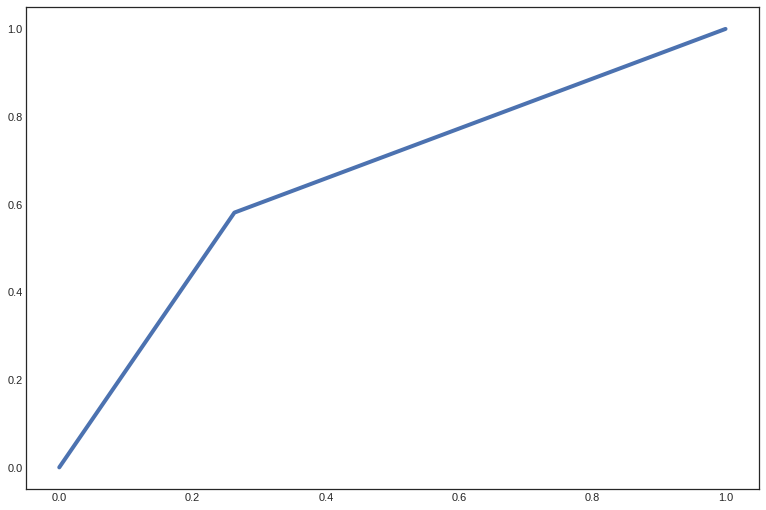

In [ ]:
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)

In [ ]:
roc_auc

0.659111969111969